# LLM Judgment - Human Judgment as a Target

This experiments applied the signed differecnes of LLM labels and human labels as a target for analysis the features.

In [15]:
import pandas as pd
import glob
import statsmodels.api as sm
import numpy as np

In [ ]:
## Function to check model assumptions 
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_residuals(result):
    
    # Extract residuals and fitted values
    residuals = result.resid
    fitted_values = result.fittedvalues

    # Q-Q plot
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, edgecolor='k')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # Residuals vs. Fitted values
    plt.figure(figsize=(8, 6))
    plt.scatter(fitted_values, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted Values')
    plt.show()

In [2]:
# Load each text file into a DataFrame
qrel_human_df = pd.read_csv('./qrels/2023.qrels.pass.withDupes.txt', delimiter=' ', header=None, names=['qid', 'Q0', 'docid', 'label'])  # adjust delimiter if necessary
qrel_llm_df = pd.read_csv('./qrels/2023.qrels.pass.gpt4.txt', delimiter=' ', header=None, names=['qid', 'Q0', 'docid', 'label'])

# Merge the two DataFrames based on a common column, e.g., 'id'
qrels_df = pd.merge(qrel_human_df, qrel_llm_df, on=['qid', 'docid'])

qrels_df.drop(['Q0_x'], axis=1, inplace=True)
qrels_df.drop(['Q0_y'], axis=1, inplace=True)

qrels_df.rename(columns={'label_x': 'label_human'}, inplace=True)
qrels_df.rename(columns={'label_y': 'label_llm'}, inplace=True)

qrels_df['llm_human_diff'] = qrels_df['label_llm'] - qrels_df['label_human']

# Display or save the merged DataFrame
# print(qrels_df['llm-human'])

In [3]:
queries_judged = set(qrels_df['qid'])
real_queries_judged = [x for x in queries_judged if x < 3000000]
t5_queries_judged = [x for x in queries_judged if x > 3000000 and x < 3100000]
gpt4_queries_judged = [x for x in queries_judged if x > 3100000]

In [4]:
qid_to_info = pd.read_csv("infos/query_to_info.txt", sep='\t')
doc_to_info = pd.read_csv("infos/doc_to_info.txt", sep='\t')

In [5]:
data = pd.merge(qrels_df, qid_to_info, on='qid')
data = pd.merge(data, doc_to_info, on='docid')

In [6]:
data.head(20)
#data.describe

,qid,docid,label_human,label_llm,llm_human_diff,QL,QDR,QDS,QW,DL,isSynthetic,isGPT4,DW
0,2001010,msmarco_passage_00_257661787,0,0,0,0,0.784,0.7023,6,72.5291,0,0,56
1,2001010,msmarco_passage_00_257662430,0,0,0,0,0.784,0.7023,6,72.5291,0,0,43
2,2001010,msmarco_passage_00_257664103,0,0,0,0,0.784,0.7023,6,72.5291,0,0,46
3,2001010,msmarco_passage_00_729310942,0,1,1,0,0.784,0.7023,6,72.5291,0,0,47
4,2001010,msmarco_passage_00_729315698,1,1,0,0,0.784,0.7023,6,72.5291,0,0,45
5,2001010,msmarco_passage_00_729382608,1,0,-1,0,0.784,0.7023,6,72.5291,0,0,53
6,2001010,msmarco_passage_00_729386217,1,0,-1,0,0.784,0.7023,6,72.5291,0,0,55
7,2001010,msmarco_passage_00_729411995,1,2,1,0,0.784,0.7023,6,72.5291,0,0,59
8,2001010,msmarco_passage_00_729434403,1,0,-1,0,0.784,0.7023,6,72.5291,0,0,66
9,2001010,msmarco_passage_01_221183941,0,0,0,0,0.784,0.7023,6,72.5291,0,0,66


In [51]:
mixed_model_1 = "label_llm ~ label_human * (QL + QW + DW + isSynthetic)"
mixed_model = "llm_human_diff ~ QL + QW + isSynthetic + DW"
mixed_model_int = "llm_human_diff ~ isSynthetic * (QL + QW + DW)"

In [52]:
#import statsmodels.formula.api as smf
model = sm.MixedLM.from_formula(mixed_model_1, data, groups=data["docid"])
#model = sm.OLS.from_formula(mixed_model_int, data)
#model = smf.logit(formula = mixed_model, data= data)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:                MixedLM    Dependent Variable:    label_llm  
No. Observations:     24249      Method:                REML       
No. Groups:           21873      Scale:                 0.2773     
Min. group size:      1          Log-Likelihood:        -28585.6240
Max. group size:      324        Converged:             Yes        
Mean group size:      1.1                                          
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                0.404    0.022  18.267 0.000  0.360  0.447
label_human              0.466    0.023  20.172 0.000  0.420  0.511
QL                      -0.251    0.027  -9.290 0.000 -0.304 -0.198
QW                       0.038    0.004  10.604 0.000  0.031  0.045
DW                      -0.000    0.000  -5.573 0.000 -0.000 -0.000
isSynthetic             -0.087    0.014  -6.426 0.000 -0.114 -0.061
label_human:QL          -0.028    0.025  -1.112 0.266 -0.077  0.021
label_human:QW           0.016    0.003   5.130 0.000  0.010  0.023
label_human:DW           0.000    0.000   0.514 0.607 -0.000  0.001
label_human:isSynthetic -0.142    0.012 -11.375 0.000 -0.166 -0.117
Group Var                0.383    0.039                            
===================================================================

"""

Coefficients from the model:
Intercept                  0.403694
label_human                0.465561
QL                        -0.250675
QW                         0.038227
DW                        -0.000044
isSynthetic               -0.087071
label_human:QL            -0.027880
label_human:QW             0.016451
label_human:DW             0.000125
label_human:isSynthetic   -0.141600
Group Var                  1.380856
dtype: float64
P-values from the model:
Intercept                  1.514712e-74
label_human                1.715750e-90
QL                         1.535753e-20
QW                         2.858099e-26
DW                         2.501587e-08
isSynthetic                1.310508e-10
label_human:QL             2.661941e-01
label_human:QW             2.891069e-07
label_human:DW             6.072088e-01
label_human:isSynthetic    5.573908e-30
Group Var                  4.063208e-77
dtype: float64


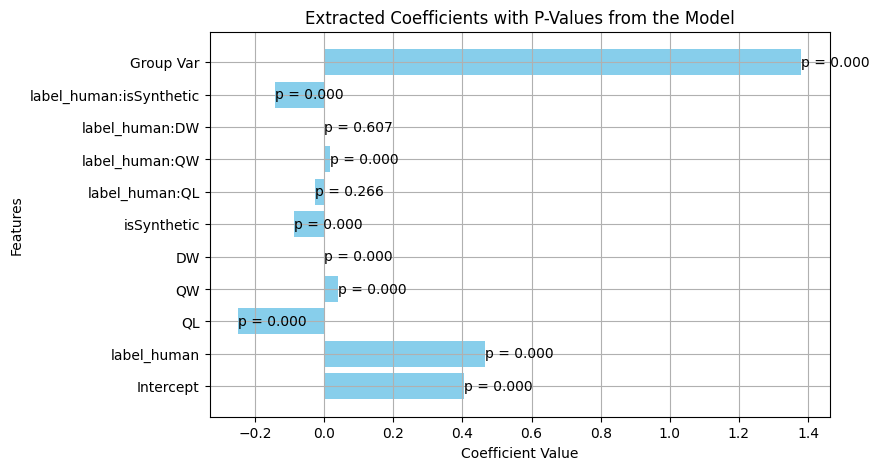

In [53]:
# Step 1: Extract the coefficients and p-values
coefficients = result.params
p_values = result.pvalues

print("Coefficients from the model:")
print(coefficients)
print("P-values from the model:")
print(p_values)

# Step 2: Plot the coefficients with p-values
# Convert coefficients and p-values to a DataFrame for easy plotting
coeff_df = pd.DataFrame({
    'coefficients': coefficients,
    'p_values': p_values,
    'features': coefficients.index
})

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.barh(coeff_df['features'], coeff_df['coefficients'], color='skyblue')

# Add the p-values as text annotations next to each bar
for bar, p_value in zip(bars, coeff_df['p_values']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'p = {p_value:.3f}', 
             va='center', ha='left', fontsize=10)

# Add titles and labels
plt.title('Extracted Coefficients with P-Values from the Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)

# Display the plot
plt.show()

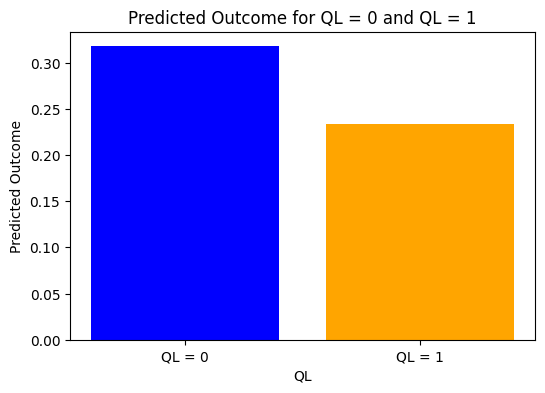

In [27]:
# Create two copies of the data: one for QL = 0 and one for QL = 1
data_ql_0 = data.copy()
data_ql_1 = data.copy()

# Set QL to 0 for the first dataset
data_ql_0['QL'] = 0

# Set QL to 1 for the second dataset
data_ql_1['QL'] = 1

# Predict outcomes when QL = 0 and QL = 1
predictions_ql_0 = result.predict(data_ql_0)
predictions_ql_1 = result.predict(data_ql_1)

# Calculate the mean predicted outcome for QL = 0 and QL = 1
mean_pred_ql_0 = np.mean(predictions_ql_0)
mean_pred_ql_1 = np.mean(predictions_ql_1)

# Plot the predictions
plt.figure(figsize=(6, 4))
plt.bar(['QL = 0', 'QL = 1'], [mean_pred_ql_0, mean_pred_ql_1], color=['blue', 'orange'])
plt.title('Predicted Outcome for QL = 0 and QL = 1')
plt.ylabel('Predicted Outcome')
plt.xlabel('QL')
plt.show()

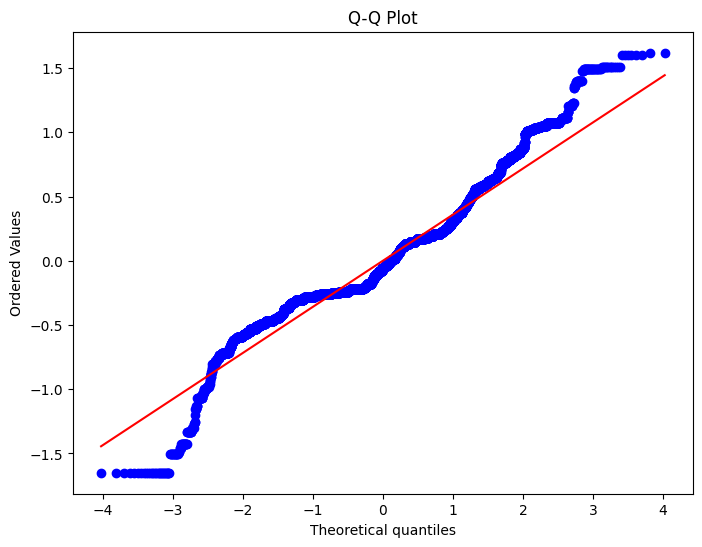

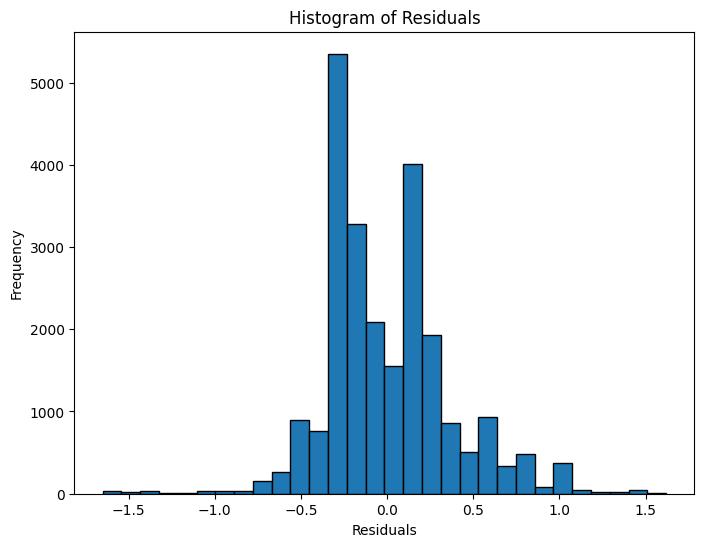

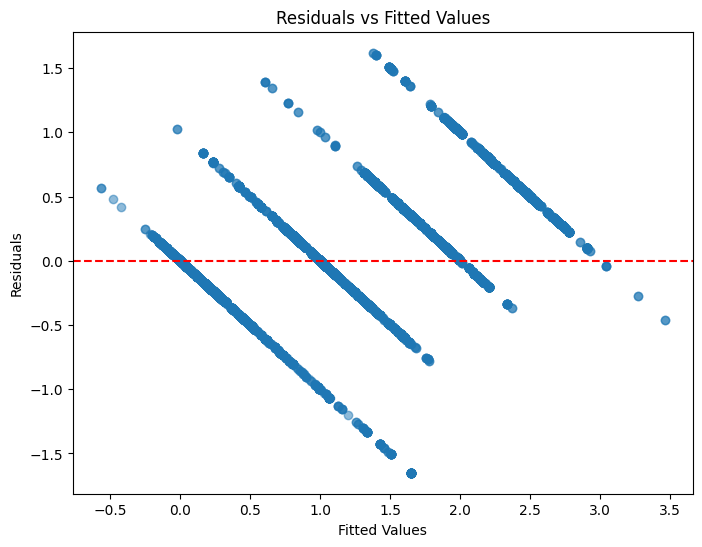

In [48]:
plot_residuals(result)

In [35]:
mixed_model_int = "score ~ isGPT4 + Judge + QL + QDR + QW + C(LLM, Treatment(reference='Other')) + C(Judge, Treatment(reference='nist')) * C(LLM, Treatment(reference='Other')) + isGPT4 * C(LLM, Treatment(reference='Other')) + pipeline"

In [ ]:
model = sm.MixedLM.from_formula(mixed_model_int, data, groups=data["run_id"])
result = model.fit()
result.summary()

In [11]:
real_queries_real_judgments = data[((data['Judge'] == 'nist') & (data['qid'].isin(real_queries_judged)))]
synthetic_queries_real_judgments = data[((data['Judge'] == 'nist') & (data['qid'].isin(t5_queries_judged) | data['qid'].isin(gpt4_queries_judged)))]

In [12]:
real_queries_synthetic_judgments = data[((data['Judge'] == 'gpt4') & (data['qid'].isin(real_queries_judged)))]
synthetic_queries_synthetic_judgments = data[((data['Judge'] == 'gpt4') & (data['qid'].isin(t5_queries_judged) | data['qid'].isin(gpt4_queries_judged)))]

In [13]:
mixed_model_condition_Qreal = "score ~ QL + QDR + QW + C(LLM, Treatment(reference='Other')) + pipeline"
mixed_model_condition_Qsynthetic = "score ~ QL + QDS + QW + C(LLM, Treatment(reference='Other')) + pipeline"

In [ ]:
model = sm.MixedLM.from_formula(mixed_model_condition_Qreal, real_queries_real_judgments, groups=real_queries_real_judgments["run_id"])
result = model.fit()
result.summary()

In [ ]:
model = sm.MixedLM.from_formula(mixed_model_condition_Qsynthetic, synthetic_queries_real_judgments, groups=synthetic_queries_real_judgments["run_id"])
result = model.fit()
result.summary()

In [ ]:
model = sm.MixedLM.from_formula(mixed_model_condition_Qreal, real_queries_synthetic_judgments, groups=real_queries_synthetic_judgments["run_id"])
result = model.fit()
result.summary()

In [ ]:
model = sm.MixedLM.from_formula(mixed_model_condition_Qsynthetic, synthetic_queries_synthetic_judgments, groups=synthetic_queries_synthetic_judgments["run_id"])
result = model.fit()
result.summary()

In [18]:
# Merging the dataframes on 'run_id' and 'qid'
real_queries_diff = pd.merge(real_queries_real_judgments, real_queries_synthetic_judgments[['run_id', 'qid', 'score']], on=['run_id', 'qid'], suffixes=('_a', '_b'))
# Subtracting the 'Score' values
real_queries_diff['score_ab'] = real_queries_diff['score_a'] - real_queries_diff['score_b']
real_queries_diff['score_ba'] = real_queries_diff['score_b'] - real_queries_diff['score_a']

In [ ]:
real_queries_diff

In [ ]:
model = sm.MixedLM.from_formula("score_ab ~ QL + QDR + QW + C(LLM, Treatment(reference='Other')) + pipeline", real_queries_diff, groups=real_queries_diff["run_id"])
result = model.fit()
result.summary()

In [ ]:
model = sm.MixedLM.from_formula("score_ba ~ QL + QDR + QW + C(LLM, Treatment(reference='Other')) + pipeline", real_queries_diff, groups=real_queries_diff["run_id"])
result = model.fit()
result.summary()

In [21]:
# Merging the dataframes on 'run_id' and 'qid'
synthetic_queries_diff = pd.merge(synthetic_queries_real_judgments, synthetic_queries_synthetic_judgments[['run_id', 'qid', 'score']], on=['run_id', 'qid'], suffixes=('_a', '_b'))
# Subtracting the 'Score' values
synthetic_queries_diff['score_ab'] = synthetic_queries_diff['score_a'] - synthetic_queries_diff['score_b']
synthetic_queries_diff['score_ba'] = synthetic_queries_diff['score_b'] - synthetic_queries_diff['score_a']

In [ ]:
synthetic_queries_diff

In [ ]:
model = sm.MixedLM.from_formula("score_ab ~ QL + QDR + QW + C(LLM, Treatment(reference='Other')) + pipeline", synthetic_queries_diff, groups=synthetic_queries_diff["run_id"])
result = model.fit()
result.summary()

In [ ]:
model = sm.MixedLM.from_formula("score_ba ~ QL + QDR + QW + C(LLM, Treatment(reference='Other')) + pipeline", synthetic_queries_diff, groups=synthetic_queries_diff["run_id"])
result = model.fit()
result.summary()

## Extra Experiments (refer to: "Extra Exp. 1")

In [6]:
def get_result(result_file):
    result_df = pd.read_csv(result_file, sep='\t', header=None, names=['run_id', 'metric', 'qid', 'score'])
    result_df = result_df[result_df['qid'] != 'all']
    result_df['score'] = result_df['score'].astype(float)
    result_df['qid'] = result_df['qid'].astype(int)
    result_df['metric'] = result_df['metric'].apply(lambda x: x.rstrip())
    result_df = result_df[(result_df['metric'] == metric)]
    result_df.drop(['metric'], axis=1, inplace=True)
    return result_df

In [7]:
real_judge_results = get_result(result_file="results/all.pass.nist.ndcgeval")
synthetic_judge_results = get_result(result_file="results/all.pass.gpt4.ndcgeval")

In [9]:
# Merging the dataframes on 'run_id' and 'qid'
results_diff = pd.merge(real_judge_results, synthetic_judge_results, on=['run_id', 'qid'], suffixes=('_real', '_synthetic'))
# Subtracting the 'Score' values
results_diff['score_RS'] = results_diff['score_real'] - results_diff['score_synthetic']
results_diff['score_SR'] = results_diff['score_synthetic'] - results_diff['score_real']

In [13]:
results_diff = pd.merge(results_diff, qid_to_info, on='qid')
results_diff = pd.merge(results_diff, model_to_info, on='run_id')

In [ ]:
results_diff

Selected: score_SR

In [17]:
results_diff['qd_RS'] = results_diff['QDR'] - results_diff['QDS']
results_diff['qd_SR'] = results_diff['QDS'] - results_diff['QDR']

In [21]:
mixed_model_1 = "score_SR ~ Synthetic + QL + qd_SR + QW + DL + pipeline + C(LLM, Treatment(reference='Other')) + Synthetic * C(LLM, Treatment(reference='Other'))"

In [ ]:
model = sm.MixedLM.from_formula(mixed_model_1, results_diff, groups=results_diff["run_id"])
result = model.fit()
result.summary()